# USING THE NEW YORK TIME API, WE WILL ANALYZE SENTIMENT OF THE LAST TWO MONTHS OF THE YEAR FROM 1992-2019 TO PREDICT SENTIMENT FOR 2020.

In [71]:
import os
import pandas as pd
from dotenv import load_dotenv
from nytimesarticle import articleAPI
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
from pathlib import Path

import numpy as np
import hvplot.pandas

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
load_dotenv()

True

In [81]:
#called api key
nyt_api_key = os.getenv("NYT_API")

api= articleAPI(nyt_api_key)

api

In [82]:
# pulled articles from NYT (90s)
articles_92 = api.search(q="holiday sales",begin_date=19921101, end_date=19921231)
articles_93 = api.search(q="holiday sales",begin_date=19931101, end_date=19931231)
articles_94 = api.search(q="holiday sales",begin_date=19941101, end_date=19941231)
articles_95 = api.search(q="holiday sales",begin_date=19951101, end_date=19951231)
articles_96 = api.search(q="holiday sales",begin_date=19961101, end_date=19961231)
articles_97 = api.search(q="holiday sales",begin_date=19971101, end_date=19971231)
articles_98 = api.search(q="holiday sales",begin_date=19981101, end_date=19981231)
articles_99 = api.search(q="holiday sales",begin_date=19991101, end_date=19991231)

In [83]:
# pulled articles from NYT(00s)
articles_00 = api.search(q="holiday sales",begin_date=20001101, end_date=20001231)
articles_01 = api.search(q="holiday sales",begin_date=20011101, end_date=20011231)
articles_02 = api.search(q="holiday sales",begin_date=20021101, end_date=20021231)
articles_03 = api.search(q="holiday sales",begin_date=20031101, end_date=20031231)
articles_04 = api.search(q="holiday sales",begin_date=20041101, end_date=20041231)
articles_05 = api.search(q="holiday sales",begin_date=20051101, end_date=20051231)
articles_06 = api.search(q="holiday sales",begin_date=20061101, end_date=20061231)
articles_07 = api.search(q="holiday sales",begin_date=20071101, end_date=20071231)
articles_08 = api.search(q="holiday sales",begin_date=20081101, end_date=20081231)
articles_09 = api.search(q="holiday sales",begin_date=20091101, end_date=20091231)


In [84]:
#pulled articles for NYT (00-19)
articles_10 = api.search(q="holiday sales",begin_date=20101101, end_date=20101231)
articles_11 = api.search(q="holiday sales",begin_date=20111101, end_date=20111231)
articles_12 = api.search(q="holiday sales",begin_date=20121101, end_date=20121231)
articles_13 = api.search(q="holiday sales",begin_date=20131101, end_date=20131231)
articles_14 = api.search(q="holiday sales",begin_date=20141101, end_date=20141231)
articles_15 = api.search(q="holiday sales",begin_date=20151101, end_date=20151231)
articles_16 = api.search(q="holiday sales",begin_date=20161101, end_date=20161231)
articles_17 = api.search(q="holiday sales",begin_date=20171101, end_date=20171231)
articles_18 = api.search(q="holiday sales",begin_date=20181101, end_date=20181231)
articles_19 = api.search(q="holiday sales",begin_date=20191101, end_date=20191231)


In [85]:
# Dataframe for 92
articles92= articles_92['response']
articles_df_92 = pd.DataFrame(articles92['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])

articles_df_92.head()

KeyError: "None of ['pub_date'] are in the columns"

In [ ]:
# Dataframe for 93
articles93= articles_93['response']
articles_df_93 = pd.DataFrame(articles93['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_93.head()

In [ ]:
# Dataframe for 94
articles94= articles_94['response']
articles_df_94 = pd.DataFrame(articles94['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_94.head()

In [ ]:
# Dataframe for 95
articles95= articles_95['response']
articles_df_95 = pd.DataFrame(articles95['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_95.head()

In [ ]:
# Dataframe for 96
articles96= articles_96['response']
articles_df_96 = pd.DataFrame(articles96['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_96.head()

In [ ]:
# Dataframe for 97
articles97= articles_97['response']
articles_df_97 = pd.DataFrame(articles97['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_97.head()

In [ ]:
# Dataframe for 98
articles98= articles_98['response']
articles_df_98 = pd.DataFrame(articles98['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_98.head()

In [ ]:
# Dataframe for 99
articles99= articles_99['response']
articles_df_99 = pd.DataFrame(articles99['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_99.head()

In [ ]:
# Dataframe for 00
articles00= articles_00['response']
articles_df_00 = pd.DataFrame(articles00['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_00.head()

In [ ]:
# Dataframe for 01
articles01= articles_01['response']
articles_df_01 = pd.DataFrame(articles01['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_01.head()

In [ ]:
# Dataframe for 02
articles02= articles_02['response']
articles_df_02 = pd.DataFrame(articles02['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_02.head()

In [ ]:
# Dataframe for 03
articles03= articles_03['response']
articles_df_03 = pd.DataFrame(articles03['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_03.head()

In [ ]:
# Dataframe for 04
articles04= articles_04['response']
articles_df_04 = pd.DataFrame(articles04['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_04.head()

In [ ]:
# Dataframe for 05
articles05= articles_05['response']
articles_df_05 = pd.DataFrame(articles05['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_05.head()

In [ ]:
# Dataframe for 06
articles06= articles_06['response']
articles_df_06 = pd.DataFrame(articles06['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_06.head()

In [ ]:
# Dataframe for 07
articles07= articles_07['response']
articles_df_07 = pd.DataFrame(articles07['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_07.head()

In [ ]:
# Dataframe for 08
articles08= articles_08['response']
articles_df_08 = pd.DataFrame(articles08['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_08.head()

In [ ]:
# Dataframe for 09
articles09= articles_09['response']
articles_df_09 = pd.DataFrame(articles09['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_09.head()

In [ ]:
# Dataframe for 10
articles10= articles_10['response']
articles_df_10 = pd.DataFrame(articles10['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_10.head()

In [ ]:
# Dataframe for 11
articles11= articles_11['response']
articles_df_11 = pd.DataFrame(articles11['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_11.head()

In [ ]:
# Dataframe for 12
articles12= articles_12['response']
articles_df_12 = pd.DataFrame(articles12['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_12.head()

In [ ]:
# Dataframe for 13
articles13= articles_13['response']
articles_df_13 = pd.DataFrame(articles13['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_13.head()

In [ ]:
# Dataframe for 14
articles14= articles_14['response']
articles_df_14 = pd.DataFrame(articles14['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_14.head()

In [ ]:
# Dataframe for 15
articles15= articles_15['response']
articles_df_15 = pd.DataFrame(articles15['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_15.head()

In [ ]:
# Dataframe for 16
articles16= articles_16['response']
articles_df_16 = pd.DataFrame(articles16['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_16.head()

In [ ]:
# Dataframe for 17
articles17= articles_17['response']
articles_df_17 = pd.DataFrame(articles17['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_17.head()

In [ ]:
# Dataframe for 18
articles18= articles_18['response']
articles_df_18 = pd.DataFrame(articles18['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_18.head()

In [ ]:
# Dataframe for 19
articles19= articles_19['response']
articles_df_19 = pd.DataFrame(articles19['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_19.head()

In [ ]:
#concat all dataframes into one

NYT_articles= pd.concat([articles_df_92,articles_df_93,articles_df_94, articles_df_95, articles_df_96,articles_df_97,articles_df_98,articles_df_99,articles_df_00
                        ,articles_df_01,articles_df_02, articles_df_03, articles_df_04, articles_df_05
                        ,articles_df_06, articles_df_07, articles_df_08, articles_df_09
                        , articles_df_10,articles_df_11, articles_df_12, articles_df_13,articles_df_14,articles_df_15
                        ,articles_df_16, articles_df_17, articles_df_18,articles_df_19])
NYT_articles.head()

In [ ]:
# clean up data

NYT_articles.isnull().sum()


In [ ]:
# create a dataframe with just the abstract.

NYT_abstract= NYT_articles.drop(columns=['headline','keywords','lead_paragraph'])
NYT_abstract.head()

In [ ]:
NYT_abstract.reset_index().head()

In [ ]:
# function to get sentiment from dataframe NYT_abstract

def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [ ]:
# created sentiment scores for "abstract" and a new dataframe with scores.

nltk_results=[nltk_sentiment(abstract) for abstract in NYT_abstract["abstract"]]
results_df = pd.DataFrame(nltk_results)

nltk_df = results_df.join(NYT_abstract.reset_index())
nltk_df= nltk_df[['pub_date', 'abstract','compound', 'neg', 'neu', 'pos']]
nltk_df.head()

In [ ]:
nltk_df.to_csv("NYT_nlk_updated")

In [ ]:
nltk_df.describe()

In [ ]:
nltk_df.to_csv("NYT_updated.csv")

In [72]:
# loading full data

file_path=Path("NEW_Nov_Dec_NLTK_Average_Sentiment_Score_2.csv")
NYTIMES_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
NYTIMES_df=NYTIMES_df.set_index('DATE').sort_values('DATE',ascending=True)
NYTIMES_df.head()

,compound
DATE,
11/1/1992,0.812100
11/1/1993,0.762175
11/1/1994,0.667100
11/1/1995,0.485533
11/1/1996,0.722600


# importing Nov Dec retail sales with all the features

In [73]:

file_path=Path("nov_dec_featuress.csv")
Nov_dec_df=pd.read_csv(file_path, index_col="DATE",infer_datetime_format=True,parse_dates=True)
#Nov_dec_df=Nov_dec_df.set_index('DATE').sort_values('DATE',ascending=True)
Nov_dec_df=Nov_dec_df.sort_values('DATE',ascending=True)


In [74]:
Nov_dec_df.tail()

,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,
2018-11-01,446894.0,2.64725,97.5,3.7,252.662,97.196,5.520130,2.5,18813.923
2018-12-01,435953.0,2.36560,98.3,3.9,252.653,95.735,5.520130,2.5,18813.923
2019-11-01,460760.0,2.59775,96.8,3.5,257.824,98.202,5.614131,2.3,19253.959
2019-12-01,460512.0,2.55500,99.3,3.5,258.444,96.058,5.614131,2.3,19253.959
NaT,NaN,NaN,NaN,NaN,NaN,93.688,4.972469,-9.0,17302.511


In [75]:
Main_df= NYTIMES_df.join(Nov_dec_df,sort=False)
Main_df.head()

,compound,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,,
1992-11-01,0.812100,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
1993-11-01,0.762175,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
1994-11-01,0.667100,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372
1995-11-01,0.485533,189055.0,1.06225,88.2,5.6,153.7,85.37,5.594352,2.2,10737.478
1996-11-01,0.722600,200174.0,1.23225,99.2,5.4,158.7,87.88,5.777011,4.4,11212.205


In [76]:
Main_df.tail()

,compound,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,,
2015-12-01,-0.421500,397123.0,2.03750,92.6,5.0,237.761,98.745,5.399252,2.2,17514.062
2016-12-01,0.302650,412753.0,2.25425,98.2,4.7,242.712,102.286,5.591750,2.1,17876.179
2017-12-01,0.000000,433877.0,2.47675,95.9,4.1,247.847,91.826,5.576678,2.7,18359.432
2018-12-01,0.346600,435953.0,2.36560,98.3,3.9,252.653,95.735,5.520130,2.5,18813.923
2019-12-01,0.222725,460512.0,2.55500,99.3,3.5,258.444,96.058,5.614131,2.3,19253.959


In [77]:
all_months=pd.read_csv(Path("..//HolidaySales/DataSets/features.csv"),  index_col="DATE",infer_datetime_format=True,parse_dates=True)

# Exploratory Data Analysis 

<AxesSubplot:title={'center':'Holiday Sales'}, xlabel='DATE'>

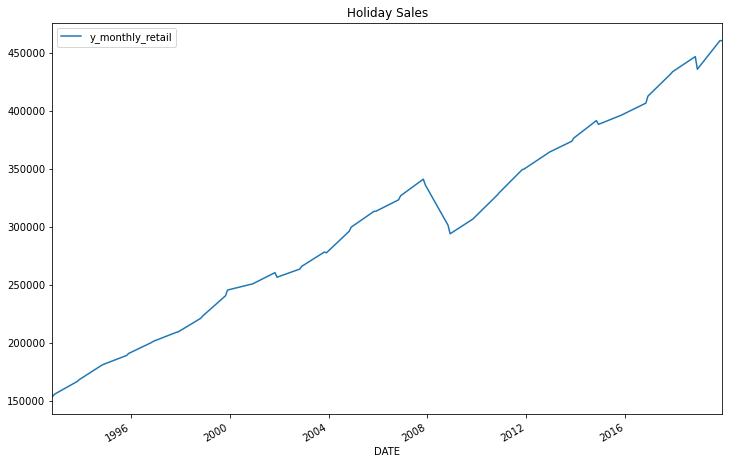

In [78]:
#Holiday Sales
Main_df[["y_monthly_retail"]].plot(figsize=(12, 8), title="Holiday Sales")

<AxesSubplot:title={'center':'Holiday Sales all Months'}, xlabel='DATE'>

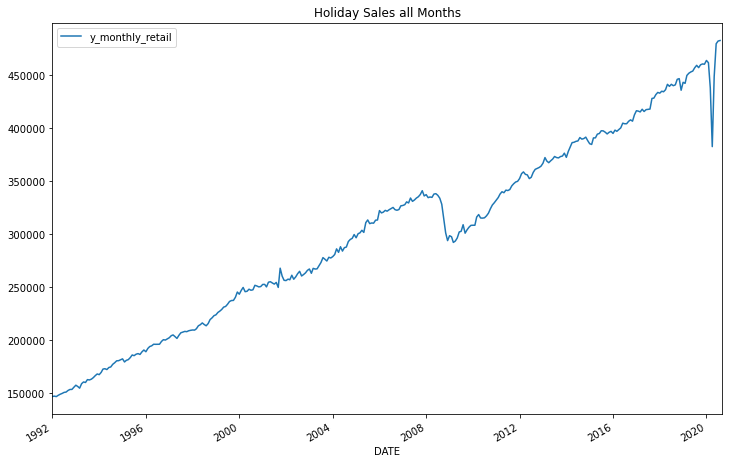

In [79]:
all_months[["y_monthly_retail"]].plot(figsize=(12, 8), title="Holiday Sales all Months")

In [80]:
#NYT times sentiments graphs
Main_df.compound.plot()

AttributeError: 'function' object has no attribute 'plot'

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y_monthly_retail', ylabel='Density'>

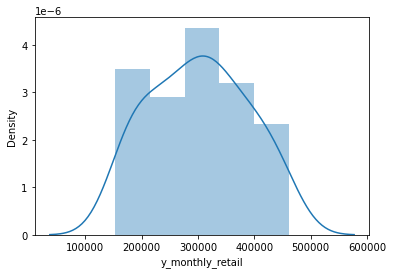

In [81]:
sns.distplot(Main_df.y_monthly_retail)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gas_prices', ylabel='Density'>

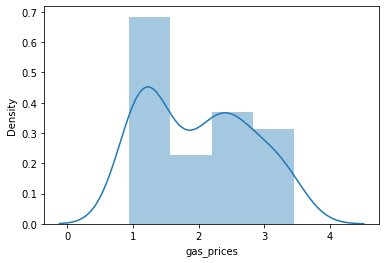

In [82]:
sns.distplot(Main_df.gas_prices)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

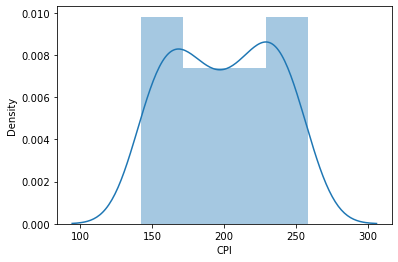

In [83]:
sns.distplot(Main_df.CPI)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDPC1', ylabel='Density'>

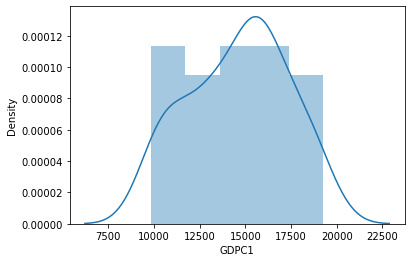

In [84]:
sns.distplot(Main_df.GDPC1)

# Application of Hodrick-Prescott filter on the dataframe

In [85]:
#Hodrick-Prescott filter on columns "y_monthly_retail" , "CPI", 'GDP_growth', 'GDPC1'
import statsmodels.api as sm
ts_noise1, ts_trend1 = sm.tsa.filters.hpfilter(Main_df['y_monthly_retail'])
ts_noise2, ts_trend2 = sm.tsa.filters.hpfilter(Main_df['CPI'])
ts_noise4, ts_trend4 = sm.tsa.filters.hpfilter(Main_df['GDPC1'])

In [86]:
Main_df['Sales']= ts_noise1
Main_df['CPI']= ts_noise2
Main_df['GDP']= ts_noise4
Main_df= Main_df.drop(columns={'y_monthly_retail','GDPC1'})
Main_df= Main_df.rename(columns={'Pct_chng_prv_yr':'GDP_growth', 'Sales':'sales', 'compound':'NYT_sentiment', 'dow_index':'retail_index'})
Main_df.tail()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP
DATE,,,,,,,,,,
2015-12-01,-0.421500,2.03750,92.6,5.0,2.003644,98.745,5.399252,2.2,8444.025888,257.481420
2016-12-01,0.302650,2.25425,98.2,4.7,2.737403,102.286,5.591750,2.1,13296.818400,305.310794
2017-12-01,0.000000,2.47675,95.9,4.1,3.636880,91.826,5.576678,2.7,23557.309410,471.852246
2018-12-01,0.346600,2.36560,98.3,3.9,4.197560,95.735,5.520130,2.5,14725.149369,608.339093
2019-12-01,0.222725,2.55500,99.3,3.5,5.739651,96.058,5.614131,2.3,28358.265413,729.914743


In [87]:
Main_df.to_csv("Main_df.csv")

In [88]:
#combiing our Main_df dataframe with Gold returns
file_path=Path("MAIN_DF_WITH_GOLD.csv")
MAIN_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
MAIN_df=MAIN_df.set_index('DATE').sort_values('DATE',ascending=True).drop(columns={'Unnamed: 0'})
MAIN_df.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns
DATE,,,,,,,,,,,
11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,0.000000,4.660212,4.4,-18182.99304,-576.109447,0.000000
11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956
11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500
11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632
11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389


In [89]:
MAIN_df.columns

Index(['NYT_sentiment', 'gas_prices', 'consumer_sentiments',
       'unemployment_rate', 'CPI', 'Retail_Index_Returns',
       'Consumer_debt_service', 'GDP_growth', 'sales', 'GDP', 'Gold_Returns'],
      dtype='object')

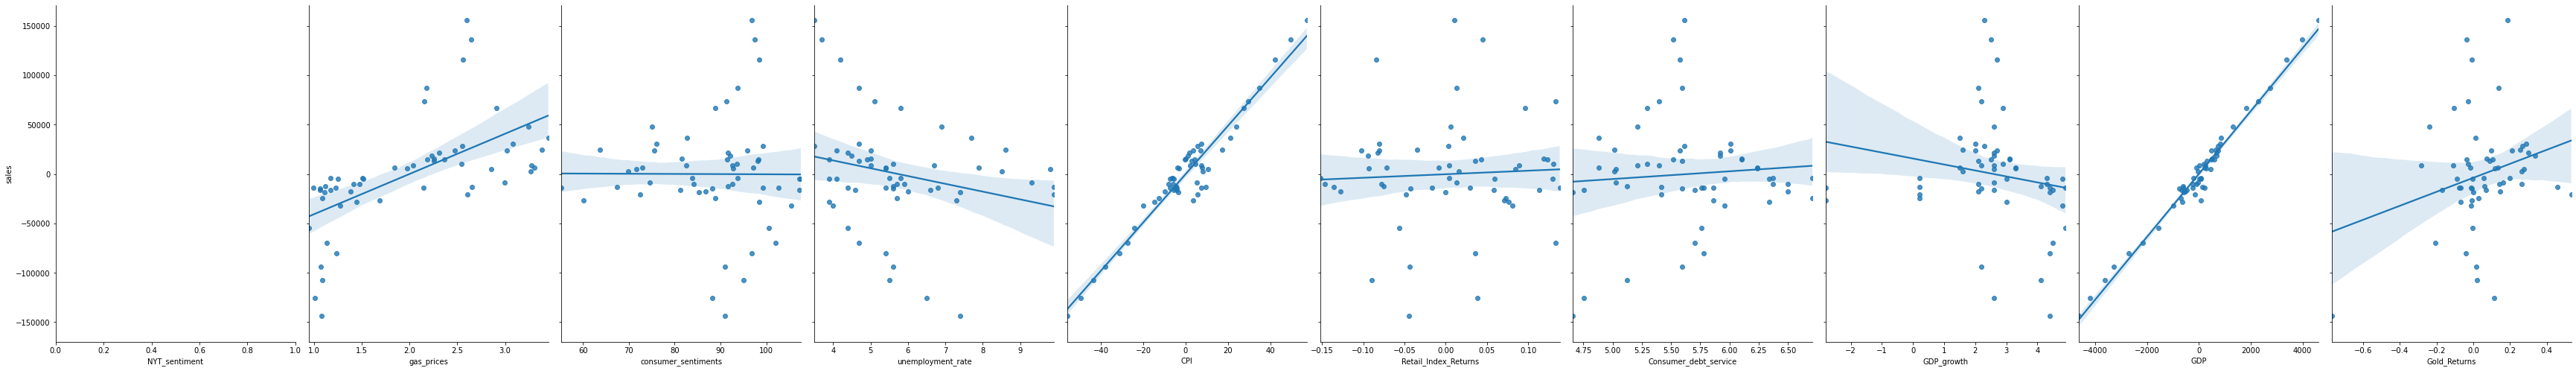

In [90]:
sns.pairplot(MAIN_df, x_vars=['NYT_sentiment','gas_prices', 'consumer_sentiments','unemployment_rate','CPI','Retail_Index_Returns','Consumer_debt_service','GDP_growth','GDP', 'Gold_Returns'], y_vars='sales', height=7, aspect=.7, kind='reg')

In [91]:
#quantified pearson corelation values between sales and other features(GDPCI)
MAIN_df.CPI.corr(MAIN_df.sales)

0.965211349955966

In [92]:
MAIN_df.GDP.corr(MAIN_df.sales)

0.9884916815568923

In [93]:
MAIN_df.corr()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns
NYT_sentiment,1.000000,-0.359748,0.141274,0.041893,-0.183963,0.065903,-0.114457,0.345912,-0.197558,-0.181612,-0.070163
gas_prices,-0.359748,1.000000,-0.491512,0.325284,0.682532,-0.010009,-0.302524,-0.367889,0.599383,0.590662,0.283855
consumer_sentiments,0.141274,-0.491512,1.000000,-0.772300,-0.201631,0.074400,0.267027,0.732948,-0.003984,-0.054932,-0.283533
unemployment_rate,0.041893,0.325284,-0.772300,1.000000,-0.021729,-0.111256,-0.483871,-0.381928,-0.243156,-0.204064,0.203592
CPI,-0.183963,0.682532,-0.201631,-0.021729,1.000000,0.087599,-0.059089,-0.324210,0.965211,0.969799,0.276589
Retail_Index_Returns,0.065903,-0.010009,0.074400,-0.111256,0.087599,1.000000,-0.111948,-0.102468,0.054107,0.067469,-0.392724
Consumer_debt_service,-0.114457,-0.302524,0.267027,-0.483871,-0.059089,-0.111948,1.000000,-0.060483,0.076767,0.128035,0.195521
GDP_growth,0.345912,-0.367889,0.732948,-0.381928,-0.324210,-0.102468,-0.060483,1.000000,-0.179655,-0.242846,-0.265495
sales,-0.197558,0.599383,-0.003984,-0.243156,0.965211,0.054107,0.076767,-0.179655,1.000000,0.988492,0.258122
GDP,-0.181612,0.590662,-0.054932,-0.204064,0.969799,0.067469,0.128035,-0.242846,0.988492,1.000000,0.297074


<AxesSubplot:>

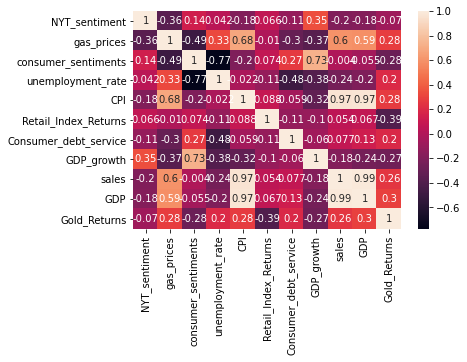

In [94]:
#heath map of the dataframe
sns.heatmap(MAIN_df.corr(),annot=True)

# Regression Model

In [95]:
#Xy split- training and testing
X=MAIN_df.copy()

In [96]:
X.drop({"sales"}, axis=1, inplace=True)

In [97]:
y=MAIN_df['sales'].values.reshape(-1,1)

In [98]:

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

In [99]:
Linreg=LinearRegression()

In [100]:
Linreg.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred=Linreg.predict(X_test)
y_pred[:]

array([[-11648.10453745],
       [-12778.4832838 ],
       [ -5309.7576766 ],
       [ 24439.51509415],
       [-76529.48920006],
       [-62110.66137452],
       [-20965.61450299],
       [ -6991.77600811],
       [ 13202.94837475],
       [ 20076.80509959],
       [  -217.34049184],
       [ 47343.18330168],
       [-19659.01658021],
       [  4688.23636716]])

In [102]:
y_pred

array([[-11648.10453745],
       [-12778.4832838 ],
       [ -5309.7576766 ],
       [ 24439.51509415],
       [-76529.48920006],
       [-62110.66137452],
       [-20965.61450299],
       [ -6991.77600811],
       [ 13202.94837475],
       [ 20076.80509959],
       [  -217.34049184],
       [ 47343.18330168],
       [-19659.01658021],
       [  4688.23636716]])

In [103]:
ts_trend1

DATE
1992-11-01    171765.993040
1993-11-01    182454.780982
1994-11-01    193132.204553
1995-11-01    203776.986394
1996-11-01    214360.080895
1997-11-01    224843.241201
1998-11-01    235179.354159
1999-11-01    245311.364590
2000-11-01    255173.438969
2001-11-01    264696.764165
2002-11-01    273809.500527
2003-11-01    282437.194174
2004-11-01    290498.990288
2005-11-01    297911.447052
2006-11-01    304594.671410
2007-11-01    310478.390023
2008-11-01    315504.047257
2009-11-01    319632.246612
2010-11-01    322814.734057
2011-11-01    324995.157281
2012-11-01    326120.176640
2013-11-01    326151.675517
2014-11-01    325074.595309
2015-11-01    322903.669492
2016-11-01    319695.259294
2017-11-01    315551.571774
2018-11-01    310629.230079
2019-11-01    305157.538251
1992-12-01    299450.965810
1993-12-01    293921.233816
1994-12-01    288890.165226
1995-12-01    284600.982851
1996-12-01    281229.805646
1997-12-01    278894.110705
1998-12-01    277661.408992
1999-12-01    2

In [104]:
#mean absolute error
mae=(metrics.mean_absolute_error(y_test, y_pred))
mae

4587.893268471552

In [105]:
#mean squared error
mse=(metrics.mean_squared_error(y_test, y_pred))
mse

37832238.890298314

In [106]:
#root mean squared error
rmse=(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse

6150.791728736905

In [107]:
#r2
r2=r2_score(y_test, y_pred)
r2

0.9665721053648395

In [108]:
## out of sample-shifted up

## DECISION TREE

In [ ]:
# Define features set
X = MAIN_df.copy()
X.drop({"sales"}, axis=1, inplace=True)

X.head()


In [ ]:
# Define target vector
y = MAIN_df["sales"].values.reshape(-1, 1)
y[:5]


In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [ ]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
DecisionRegressor = model.fit(X_train, y_train)




In [ ]:
# Making predictions using the testing data
predictions = DecisionRegressor.predict(X_test)



In [ ]:
Predictions_tree=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_tree.head()

In [ ]:
Predictions_tree.plot()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, predictions)


In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

## NEW DF FOR PREDICTIVE MODEL

In [ ]:
Main_2= MAIN_df.copy()
Main_2['shifted_sales']= Main_2.sales.shift()
Main_2=Main_2.dropna()
Main_2=Main_2.reset_index()
Main_2.head()

In [ ]:
Main_2['DATE'] =pd.to_datetime(Main_2.DATE)
Main_2= Main_2.set_index("DATE")

Main_2.head()

In [ ]:
Main_2= Main_2.sort_index()
Main_2.head()

# DECISION TREE MODEL PREDICTIVE MODEL (SHIFTED Y)

In [ ]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


In [ ]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
DecisionRegressor = model.fit(X_train, y_train)




In [ ]:
# Making predictions using the testing data
predictions = DecisionRegressor.predict(X_test)



In [ ]:
Predictions_tree=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_tree.head()

In [ ]:
Predictions_tree.plot()

In [ ]:
predictions

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, predictions)


In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

# RANDOM FOREST MODEL

In [ ]:
# Define features set
X = Main_df.copy()
X.drop({"sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = Main_df["sales"].values.reshape(-1, 1)
y[:5]



In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


## Fitting the Random Forest Model

In [ ]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test)


In [ ]:

Predictions_forest=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_forest.plot()

## EVALUATING RANDOM FOREST

In [ ]:
r2_score(y_test, predictions)


In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

## RANDOM FOREST PREDICTIVE MODEL

In [ ]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


In [ ]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [ ]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data
predictions_1 = rf_model.predict(X_test)


In [ ]:

Predictions_forest=pd.DataFrame({"Prediction": predictions_1, "Actual": y_test.ravel()}).head(20)
Predictions_forest.plot()

In [ ]:
r2_score(y_test, predictions_1)


In [ ]:
mse = mean_squared_error(y_test, predictions_1)
mse

In [ ]:
mse= mean_squared_error(y_test, predictions_1)
rmse= np.sqrt(mse)
rmse

In [ ]:
X_P= Main_2.tail(2)
X_P

In [ ]:
predictions_end = rf_model.predict(X)
predictions_end

In [ ]:
Predictions_f=pd.DataFrame({"Prediction": predictions_end, "Actual": y.ravel()})
Predictions_f

In [ ]:
Main_2.shape

## GRADIENT BOOST MODEL

In [ ]:
# Define features set
X = MAIN_df.copy()
X.drop({"sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = MAIN_df["sales"].values.reshape(-1, 1)
y[:5]



In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)



In [ ]:
# Create a regression object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
# Fit the model
regressor.fit(X_train, y_train.ravel())
    
# Make Prediction
predictions = regressor.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

In [ ]:
# Choose a learning rate and create regression
classifier = GradientBoostingRegressor(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test)
predict=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
predict.plot()

## EVALUATING THE MODEL

In [ ]:
r2_score(y_test, predictions)


In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

## GRADIENT BOOST PREDICTIVE

In [ ]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


In [ ]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)



In [ ]:
# Create a regression object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
# Fit the model
regressor.fit(X_train, y_train.ravel())
    
# Make Prediction
predictions = regressor.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

In [ ]:
r2_score(y_test, predictions)


In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

In [ ]:
# Need the df with the dates in the right order below.

# **LSTM/ Gold vs. Retail Relationship Work**

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.tsa
import statsmodels.tsa.stattools as ts 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
# DataFrame of Monthly Gold Prices 1992-2020.
file_path=Path("~/git/HolidaySales/DataSets/1992_To_2020_Monthly_Gold_clean.csv")
full_gold_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [ ]:
full_gold_df.head()

In [ ]:
# DataFrame of ALL features not including NLP sentiment from 1992 to 2020 Monthly.
file_path2=Path("~/git/HolidaySales/DataSets/features.csv")
features_df=pd.read_csv(file_path2,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [ ]:
features_df.head()

In [ ]:
# DataFrame of ALL features not including NLP sentiment from 1992 to 2020 Nov.-Dec. only.
file_path3=Path("~/git/HolidaySales/nov_dec_featuress.csv")
features_cut_df=pd.read_csv(file_path3,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [ ]:
features_cut_df.head()

In [ ]:
# DataFrame of Nov-Dec NLTK Sentiment Scores.
file_path4=Path("~/git/HolidaySales/NYT_updated.csv")
nltk_df=pd.read_csv(file_path4,infer_datetime_format=True,parse_dates=True,index_col="pub_date")

In [ ]:
# Organize and clean nltk data.
nltk_df=nltk_df.drop(columns=["Unnamed: 0"])
nltk_df.head()

In [ ]:
nltk_df=nltk_df.sort_index()

In [ ]:
nltk_df.head()

In [ ]:
nltk_df=nltk_df.drop(columns=["abstract"])

In [ ]:
nltk_df=nltk_df.drop(columns=["neg","neu","pos"])

In [ ]:
nltk_df.index.year

In [ ]:
# Average the compound sentiment score for each month.
nltk_df_grp=nltk_df.groupby([nltk_df.index.year,nltk_df.index.month]).mean()

In [ ]:
nltk_df_grp

In [ ]:
nltk_df_grp.index

In [ ]:
nltk_df_grp.index=nltk_df_grp.index.to_flat_index()

In [ ]:
nltk_df_grp.head()

In [ ]:
#nltk_df_grp.to_csv("NEW_Nov_Dec_NLTK_Average_Sentiment_Score_Annual.csv")

In [ ]:
file_path5=Path("~/git/HolidaySales/NEW_Nov_Dec_NLTK_Average_Sentiment_Score_2.csv")
df=pd.read_csv(file_path5,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [ ]:
df.head()

In [ ]:
# Get the full updated dataframe Nov/Dec ONLY w/Gold.
file_path6=Path("~/git/HolidaySales/DataSets/Main_gold.csv")
main_df=pd.read_csv(file_path6,parse_dates=True,infer_datetime_format=True)

In [ ]:
main_df.head()

In [ ]:
# Returns for Dow Index.
main_df["retail_index"]=main_df["retail_index"].pct_change()

In [ ]:
# Returns for Gold.
main_df["close"]=main_df["close"].pct_change()

In [ ]:
main_df.head()

In [ ]:
# FINAL DF WITH RETURNS FOR GOLD AND THE RETAIL INDEX NOV-DEC ONLY.
file_path7=Path("~/git/HolidaySales/MAIN_DF_WITH_GOLD.csv")
main_df=pd.read_csv(file_path7,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [ ]:
main_df=main_df.sort_index()

In [ ]:
main_df=main_df.drop(columns=["Unnamed: 0"])
main_df.head()

In [ ]:
main_df.head()

**I will now begin to analyze the relationship between the returns of the Dow Jones Retail Index and the returns of Gold. My goal/prediction is that there will be a negative correlation. They will move in opposite directions.**

In [ ]:
retail_returns=main_df["Retail_Index_Returns"]
gold_returns=main_df["Gold_Returns"]

In [ ]:
# A plot of returns on of the retail index between November/December from 1992-2019.
retail_returns.plot(figsize=(15,10),title="Dow Jones Retail Index Returns Nov-Dec 1992-2019")

In [ ]:
# A plot of returns on of the gold index between November/December from 1992-2019.
gold_returns.plot(figsize=(15,10),title="Gold Returns Nov-Dec 1992-2019")

**Below I will be running a correlation test to analyze the relationship between the Nov-Dec Dow Retail Index Returns and Nov-Dec Gold Returns. My goal is to see them move as opposite as possible, the ideal would be a score of -1. I will also run one on the Nov-Dec Dow Retail Index and February and March of the preceding year Gold Returns testing the affect of Holiday Sales on Q4 GDP and Q4 GDP on the preceding years initial Q1 Gold offerings.**

In [ ]:
retail_returns.corr(gold_returns)

**Above one can see that there is a negative correlation as predicted. We have a score of -0.39. This is solely looking at November/December. I believe that it will be even more negative if we compare Nov/Dec retail to Gold February/March which is when the Q4 report is released.**

In [ ]:
gold_returns_df=gold_returns.to_frame()

In [ ]:
retail_returns_df=retail_returns.to_frame()

In [ ]:
returns_df=gold_returns_df.merge(retail_returns_df, how='outer', left_index=True, right_index=True)

**Here we see a plot of the gold returns and retail returns one can see that while gold has steeper movements, they are moving in opposite directions for the most part.**

In [ ]:
returns_df.plot(figsize=(15,10),title="Gold vs. Dow Jones Retail Index Returns Nov-Dec 1992-2019")

In [ ]:
returns_df.corr()

In [ ]:
#gold vs retail DF February/March 1993-2019.
feb_gold_df=Path("~/git/HolidaySales/DataSets/gold_retail_febmar.csv")
f_m_gold_retail_df=pd.read_csv(feb_gold_df,parse_dates=True,infer_datetime_format=True,index_col="DATE")

In [ ]:
f_m_gold_retail_df=f_m_gold_retail_df.pct_change().dropna()

In [ ]:
f_m_gold_retail_df=f_m_gold_retail_df.rename(columns={"close":"Gold_Returns","monthly_retail":"Retail_Index_Returns"})

In [ ]:
f_m_gold_retail_df.head()

**Here I will show the relationship between both gold and the retail index returns during Feb/March of 1993-2019 looking at how the release of the previous years Q4 GDP which includes the Nov/Dec sales affects anything. I would believe that regardless of anything we should see a negative correation but it should be even stronger, but I believe the strongest is soon to come.**

In [ ]:
f_m_gold_retail_df.corr()

**I suspected that they would move in a stronger negative correlation but it actually has became more positive.**

In [ ]:
f_m_gold_retail_df["Gold_Returns"].plot(figsize=(15,10),title="Gold Returns Feb-Mar 1993-2019")

In [ ]:
f_m_gold_retail_df["Retail_Index_Returns"].plot(figsize=(15,10),title="Dow Jones Retail Index Returns Feb-Mar 1993-2019")

In [ ]:
f_m_gold_retail_df.plot(figsize=(15,10),title="Gold vs. Retail Index Returns Feb-Mar 1993-2019")

**From this last graph we can see that there is much more volatility during this period for gold which makes sense with the theory. If you were going to invest from the good holiday sales you would have already done so before they started or sometime in the November to December period, but Feb/Mar would be the time when people would make more interesting decisions on gold after looking at the health of the economy from how spending as a whole and the Q4 GDP came out to be. A perfect example is how big of a spike up gold receive in 2008 when we were in economic turmoil.I believe the best analysis will be next when we look at the Nov/Dec Retail Index vs. the Feb/Mar Gold.**

In [ ]:
f_m_gold_returns=f_m_gold_retail_df["Gold_Returns"].reset_index()

In [ ]:
f_m_gold_returns=f_m_gold_returns.drop(columns=["DATE"])

In [ ]:
retail_returns_data=retail_returns.reset_index()

In [ ]:
retail_returns_data=retail_returns_data.drop(columns=["DATE"])

In [ ]:
retail_returns_data.head()

In [ ]:
magic_df=pd.DataFrame({"Retail":retail_returns_data["Retail_Index_Returns"],"Gold":f_m_gold_returns["Gold_Returns"]})

In [ ]:
magic_df.corr()

**Not suprisingly we see here that our theory is correct. While we had somewhat of a positive correlation looking at the retail index and the gold returns during the same time period, when we compare the Feb/Mar returns of Gold for the proceeding year to the Nov/Dec returns for retail of the previous year, we can see that there is a negative correlation. We could definetly make the assumption that if one is looking at holiday sales predictions, if the numbers are looking good you should buy the retail index and sell gold and one could go as far as predicting to sell gold again in the February/March period of the next year, which is again the time frame we would expect the Q4 numbers to be released.**

In [ ]:
magic_df["Retail"].plot(figsize=(15,10),title="Retail Index Returns Nov-Dec 1992-2019")

In [ ]:
magic_df["Gold"].plot(figsize=(15,10),title="Gold Feb-Mar 1993-2019")

In [ ]:
magic_df.plot(figsize=(15,10),title="Gold Feb-Mar 1993-2019 vs. Retail Index Returns Nov-Dec 1992-2019")

### **I will now create two LSTM models with the full features dataframe, one to make unsupervised predictions for holiday sales and another to make predictions of Gold prices.**

In [ ]:
#Holiday Sales predictions.
main_df.head()

In [ ]:
# Create my features and target.
y=main_df["sales"].values
X=main_df.drop(columns=["sales"]).values

In [ ]:
y[:2]

In [ ]:
y=y.reshape(-1,1)

In [ ]:
X=X.reshape(-1,10)

In [ ]:
X.shape

In [ ]:
X[:2]

In [ ]:
y.shape

In [ ]:
y[:2]

In [ ]:
X.shape

In [ ]:
# Split the data so I can use 70% of the data for training and the remainder for testing.
split = int(0.7 * len(X))

In [ ]:
X_train = X[: split]

In [ ]:
X_test = X[split:]

In [ ]:
y_train = y[: split]

In [ ]:
y_test = y[split:]

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
scaler.fit(y)

In [ ]:
y_train = scaler.transform(y_train)

In [ ]:
y_test = scaler.transform(y_test)

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Create the instance of my Sequential model.
model = Sequential()

In [ ]:
number_units = 1000
dropout_fraction = 0.2

In [ ]:
# This is Layer 1.
model.add(LSTM(units=number_units,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(dropout_fraction))

In [ ]:
# This is Layer 2.
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

In [ ]:
# This is Layer 3.
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

In [ ]:
# Here I create my output layer.
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,epochs=100,shuffle=False,batch_size=5,verbose=1)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions

In [ ]:
# Recover the original prices instead of the scaled version
predicted_sales = scaler.inverse_transform(predictions)
real_sales = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Here I create a DataFrame of Real and Predicted values.
sales_df = pd.DataFrame({"Real": real_sales.ravel(),"Predicted": predicted_sales.ravel()}, index = df.index[-len(real_sales): ]) 
sales_df.head()

## **Model Evaluation**

In [ ]:
sales_df.plot()

In [ ]:
mse = mean_squared_error(sales_df["Real"],sales_df["Predicted"])
rmse = np.sqrt(mse)
std = np.std(sales_df["Real"])
r2=r2_score(sales_df["Real"], sales_df["Predicted"])

In [ ]:
mse

In [ ]:
rmse

In [ ]:
std

In [ ]:
r2

### A second model trying to predict holiday sales, working to get a better r2.

In [ ]:
# Create the instance of my Sequential model.
model_two = Sequential()

In [ ]:
number_units = 1000
dropout_fraction = 0.5

In [ ]:
# This is Layer 1.
model_two.add(LSTM(units=number_units,return_sequences=True,input_shape=(X_train.shape[1],1)))
model_two.add(Dropout(dropout_fraction))

In [ ]:
# This is Layer 2.
model_two.add(LSTM(units=number_units, return_sequences=True))
model_two.add(Dropout(dropout_fraction))

In [ ]:
# This is Layer 3.
model_two.add(LSTM(units=number_units, return_sequences=True))
model_two.add(Dropout(dropout_fraction))

In [ ]:
# This is Layer 4.
model_two.add(LSTM(units=number_units))
model_two.add(Dropout(dropout_fraction))

In [ ]:
# Here I create my output layer.
model_two.add(Dense(1))

In [ ]:
model_two.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model_two.summary()

In [ ]:
model_two.fit(X_train,y_train,epochs=100,shuffle=False,batch_size=5,verbose=1)

In [ ]:
model_two.evaluate(X_test,y_test)

In [ ]:
predictions_two=model_two.predict(X_test)

In [ ]:
predictions_two

In [ ]:
# Recover the original prices instead of the scaled version
predicted_sales_two = scaler.inverse_transform(predictions_two)
real_sales_two = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Here I create a DataFrame of Real and Predicted values.
sales_two_df = pd.DataFrame({"Real": real_sales_two.ravel(),"Predicted": predicted_sales_two.ravel()}, index = df.index[-len(real_sales): ]) 
sales_two_df.head()

## **Model Evaluation**

In [ ]:
sales_df.plot()

In [ ]:
sales_two_df.plot()

**After making different changes to the units, dropout rate, number of layers, and optimizer, I have found that the best setup for me is in #1 with an r2 of 0.64 which isnt bad for a whole unsupervised situation.**

In [ ]:
r2_two=r2_score(sales_two_df["Real"], sales_two_df["Predicted"])

## **Trade Alogrithm**

**Here we will simply be creating a function that will accept the best model prediction for sales and from there compare that prediction to the median value for holiday sales. If the prediction is above the median value the function would tell you to buy the retail index. From our previous correlation analysis above, we would also go a step further as well and say to sell gold.**

In [ ]:
# Correlation between sales and Retail Index Returns.
main_df["sales"].corr(main_df["Retail_Index_Returns"])

**Above we can see that there is not the strongest correlation between the retail index returns and the sales but for the sake of theory and science, here we are.**

In [ ]:
# Correlation between sales and Gold Returns.
main_df["sales"].corr(main_df["Gold_Returns"])

**This right here is pretty much ruining everything but again, theory is theory.**

In [ ]:
def get_prediction():
    

In [ ]:
main_df.head()